<a href="https://colab.research.google.com/github/Equipe16-IAA/IAA009---Deep-Learning/blob/main/CNN/CNN_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importações Deep Learing

In [ ]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix



##Carga da base

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


##Normalização dos dados

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

#dimensão dos dados
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test.shape: ", x_test.shape)
print("y_test.shape: ", y_test.shape)


x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)
x_test.shape:  (10000, 32, 32, 3)
y_test.shape:  (10000,)


##Criando a CNN

In [ ]:
K = len(set(y_train))
#Estágio 1
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
#Todas as imagens são do mesmo tamanho, não precisa de Global Pooling
x = Flatten()(x)
#Estágio 2
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
#Model (lista entrada, lista saída)
model = Model(i, x)
#Relatório do modelo
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 15, 15, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dropout (Dropout)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 1024)              118067

##Compilar e treinar o modelo

In [ ]:
#Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#Treinar o modelo
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 16s 7ms/step - loss: 1.5835 - accuracy: 0.4208 - val_loss: 1.3255 - val_accuracy: 0.5142
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2919 - accuracy: 0.5330 - val_loss: 1.1705 - val_accuracy: 0.5795
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1666 - accuracy: 0.5811 - val_loss: 1.0465 - val_accuracy: 0.6307
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0675 - accuracy: 0.6187 - val_loss: 1.0035 - val_accuracy: 0.6439
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9959 - accuracy: 0.6444 - val_loss: 0.9476 - val_accuracy: 0.6598
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9337 - accuracy: 0.6681 - val_loss: 0.9422 - val_accuracy: 0.6710
Epoch 7/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8794 - accuracy: 0.6880 - val_loss: 0.8815 - val_accuracy

##Mostrar os gráficos do treino: loss e acurácia

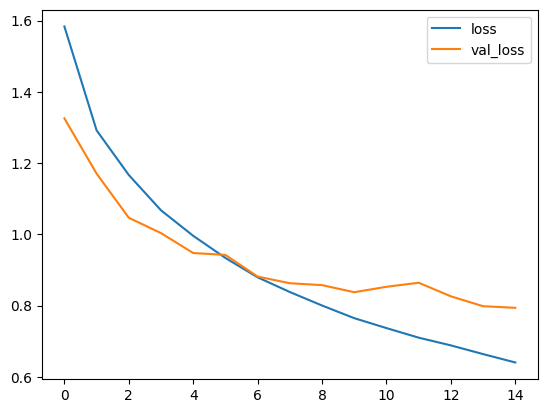

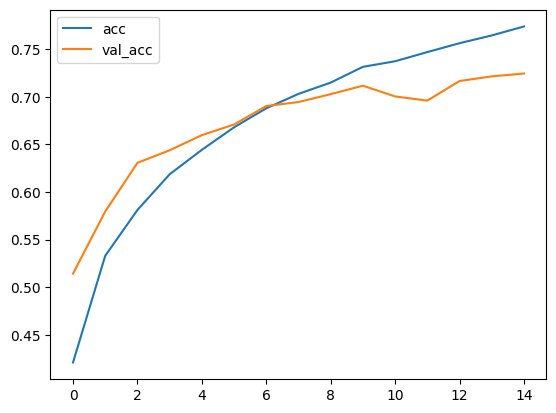

In [ ]:
#Plotar a função de perda, treino e validação
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


# Plotar acurácia, treino e validação
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

##Efetuar predição e mostrar Matriz de Confusão

313/313 [==============================] - 1s 3ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

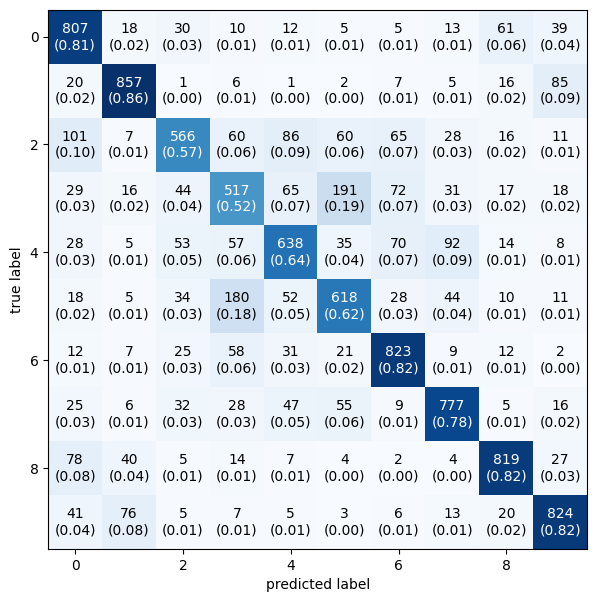

In [ ]:
#Efetuar predições na base de teste


y_pred = model.predict(x_test).argmax(axis=1)


# Mostrar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm, figsize=(7,7), show_normed=True)


##Mostrar classificações erradas

Text(0.5, 1.0, 'True label: dog Predicted: horse')

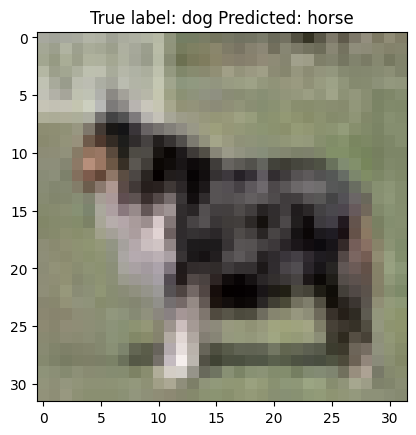

In [ ]:
# Mostrar algumas classificações erradas
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
misclassified = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[y_pred[i]]))